# Matplotlib fundamentals


In [124]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


## EDA - Exploratory data analysis

In [125]:
df.shape # long table

(4377, 5)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [128]:
df.head(20)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


In [129]:
import duckdb

duckdb.query("""
            SELECT *
             FROM df
""")
# returns duckdb strings

┌───────┬───────┬───────────────┬──────────┬────────┐
│ Year  │ Month │     Make      │ Quantity │  Pct   │
│ int64 │ int64 │    varchar    │  int64   │ double │
├───────┼───────┼───────────────┼──────────┼────────┤
│  2007 │     1 │ Toyota        │     2884 │   22.7 │
│  2007 │     1 │ Volkswagen    │     2521 │   19.9 │
│  2007 │     1 │ Peugeot       │     1029 │    8.1 │
│  2007 │     1 │ Ford          │      870 │    6.9 │
│  2007 │     1 │ Volvo         │      693 │    5.5 │
│  2007 │     1 │ Skoda         │      665 │    5.2 │
│  2007 │     1 │ Opel          │      622 │    4.9 │
│  2007 │     1 │ Audi          │      599 │    4.7 │
│  2007 │     1 │ Honda         │      423 │    3.3 │
│  2007 │     1 │ Mercedes-Benz │      362 │    2.9 │
│    ·  │     · │     ·         │        · │     ·  │
│    ·  │     · │     ·         │        · │     ·  │
│    ·  │     · │     ·         │        · │     ·  │
│  2017 │     1 │ Land Rover    │       18 │    0.1 │
│  2017 │     1 │ Dacia     

In [130]:
import duckdb

df_quantity_brand = duckdb.query("""
            SELECT 
                Make AS Brand,
                SUM(Quantity) AS Quantity
             FROM df
             GROUP BY 
                Brand 
             ORDER BY Quantity DESC         
             """).df()

df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


## Bar chart

<Axes: xlabel='Brand'>

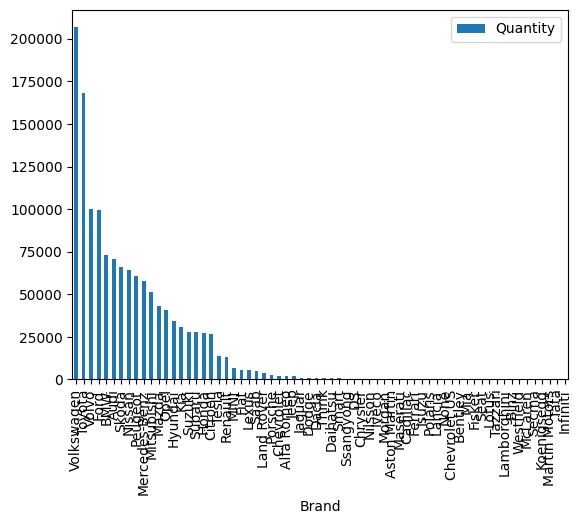

In [131]:
df_quantity_brand.plot(kind="bar", x="Brand", y= "Quantity")

<Axes: xlabel='Brand'>

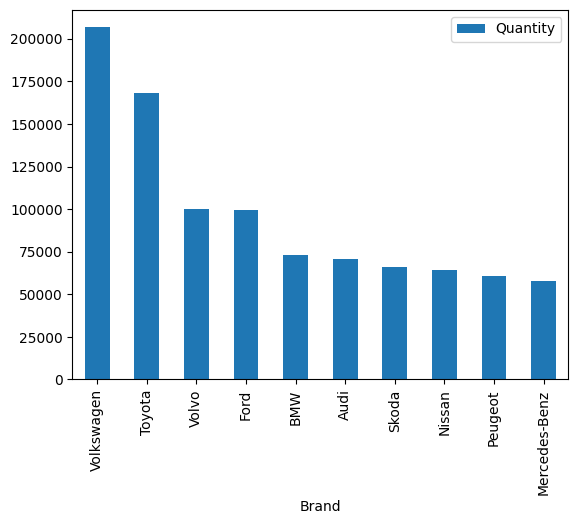

In [132]:
df_quantity_brand.head(10).plot(kind="bar", x="Brand", y= "Quantity")

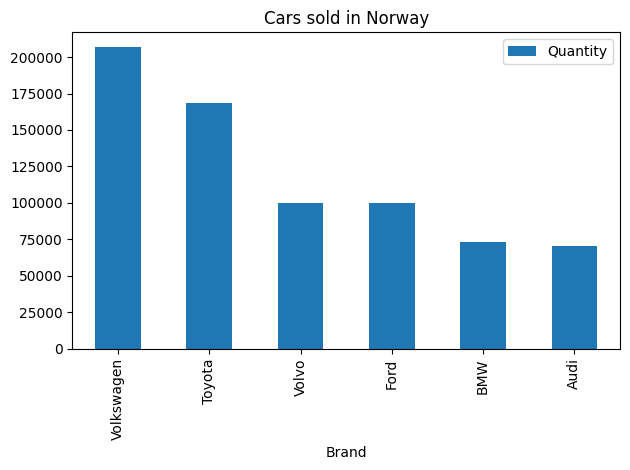

In [133]:
ax = df_quantity_brand.iloc[:6].plot(kind="bar", x="Brand", y= "Quantity", title="Cars sold in Norway") # with pandas plot method
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_top6.png")

## Matplotlib bar

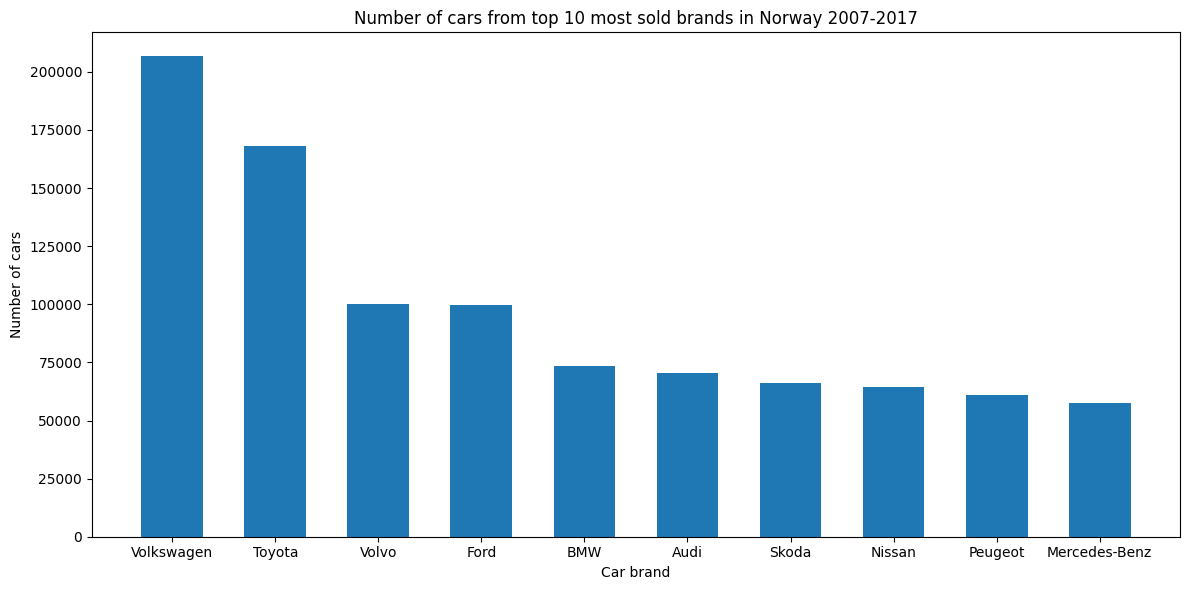

In [134]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax = plt.subplots(figsize =(12,6)) # Width, Height in inches!

ax.bar(
    x = df_quantity_brand_top10["Brand"],
    height= df_quantity_brand_top10["Quantity"],
    width = 0.6,
)

ax.set(
    title="Number of cars from top 10 most sold brands in Norway 2007-2017",
    xlabel="Car brand",
    ylabel="Number of cars",
)

fig.tight_layout()

fig.savefig("figures/bars_top10_cars.png")

## Line charts

### Are good for time series

In [135]:
df_quantity_year = duckdb.query(
    """ 
    SELECT 
        year, 
        SUM(quantity) AS Quantity
    FROM df
    GROUP BY year
    ORDER BY year
    """
).df().set_index("Year")

<Axes: xlabel='Year'>

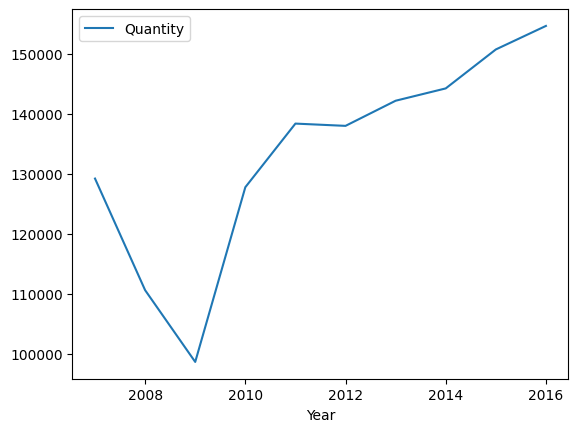

In [136]:
df_quantity_year.iloc[:-1].plot()

In [137]:
df.tail()  # it is misleading to plot the incomplete data for 2016

,Year,Month,Make,Quantity,Pct
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0
4376,2017,1,Ssangyong,1,0.0


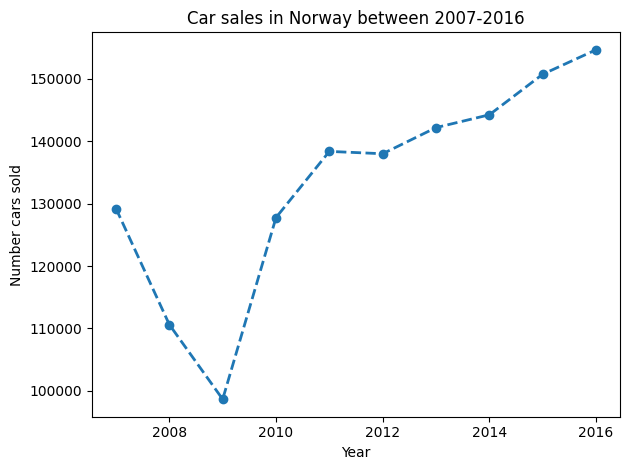

In [138]:
ax = df_quantity_year.iloc[:-1].plot(
    title="Car sales in Norway between 2007-2016", 
    xlabel="Year", 
    ylabel="Number cars sold",
    style="--o",
    linewidth=2
    )

ax.legend().remove()
fig = ax.get_figure()

fig.tight_layout()
fig.savefig("figures/car_sales_yearly_line.png")

## Stacked bar

In [139]:
duckdb.query(""" 
    SELECT 
        year, make AS Brand, SUM(quantity) AS Quantity
    FROM df
    GROUP BY year, month, make
    ORDER BY year, month
""").df()

,Year,Brand,Quantity
0,2007,Toyota,2884.0
1,2007,Citroen,263.0
2,2007,Hyundai,97.0
3,2007,Land Rover,14.0
4,2007,Jeep,2.0
...,...,...,...
4371,2017,Ssangyong,1.0
4372,2017,Volvo,1158.0
4373,2017,Maserati,2.0
4374,2017,Nissan,615.0


In [140]:
df_month_brand = duckdb.query(""" 
    SELECT 
        year || '-' || LPAD(CAST(month AS VARCHAR), 2, '0') AS date,
        make AS Brand, SUM(quantity) AS Quantity
    FROM df
    WHERE make IN ('Volvo', 'Volkswagen', 'Toyota')
    GROUP BY year, month, make
    ORDER BY year, month
""").df()

In [141]:
df_month_brand["date"] = pd.to_datetime(df_month_brand["date"], format="%Y-%m")
df_month_brand.head()

,date,Brand,Quantity
0,2007-01-01,Volkswagen,2521.0
1,2007-01-01,Toyota,2884.0
2,2007-01-01,Volvo,693.0
3,2007-02-01,Volkswagen,1517.0
4,2007-02-01,Toyota,1885.0


In [142]:
df_month_brand_pivot = df_month_brand.pivot(index="date", columns="Brand", values="Quantity").fillna(0)

In [143]:
df_month_brand_pivot.loc["2016"]

Brand,Toyota,Volkswagen,Volvo
date,,,
2016-01-01,1106.0,1743.0,643.0
2016-02-01,1374.0,2044.0,732.0
2016-03-01,1537.0,2236.0,687.0
2016-04-01,1432.0,3017.0,748.0
2016-05-01,1687.0,2222.0,619.0
2016-06-01,1603.0,2287.0,766.0
2016-07-01,1127.0,2076.0,635.0
2016-08-01,1824.0,2359.0,463.0
2016-09-01,1823.0,2084.0,763.0


In [144]:
df_month_brand_pivot.loc["2016-01":"2016-05"]

Brand,Toyota,Volkswagen,Volvo
date,,,
2016-01-01,1106.0,1743.0,643.0
2016-02-01,1374.0,2044.0,732.0
2016-03-01,1537.0,2236.0,687.0
2016-04-01,1432.0,3017.0,748.0
2016-05-01,1687.0,2222.0,619.0


In [145]:
months = df_month_brand_pivot.loc["2016"].index.month_name()

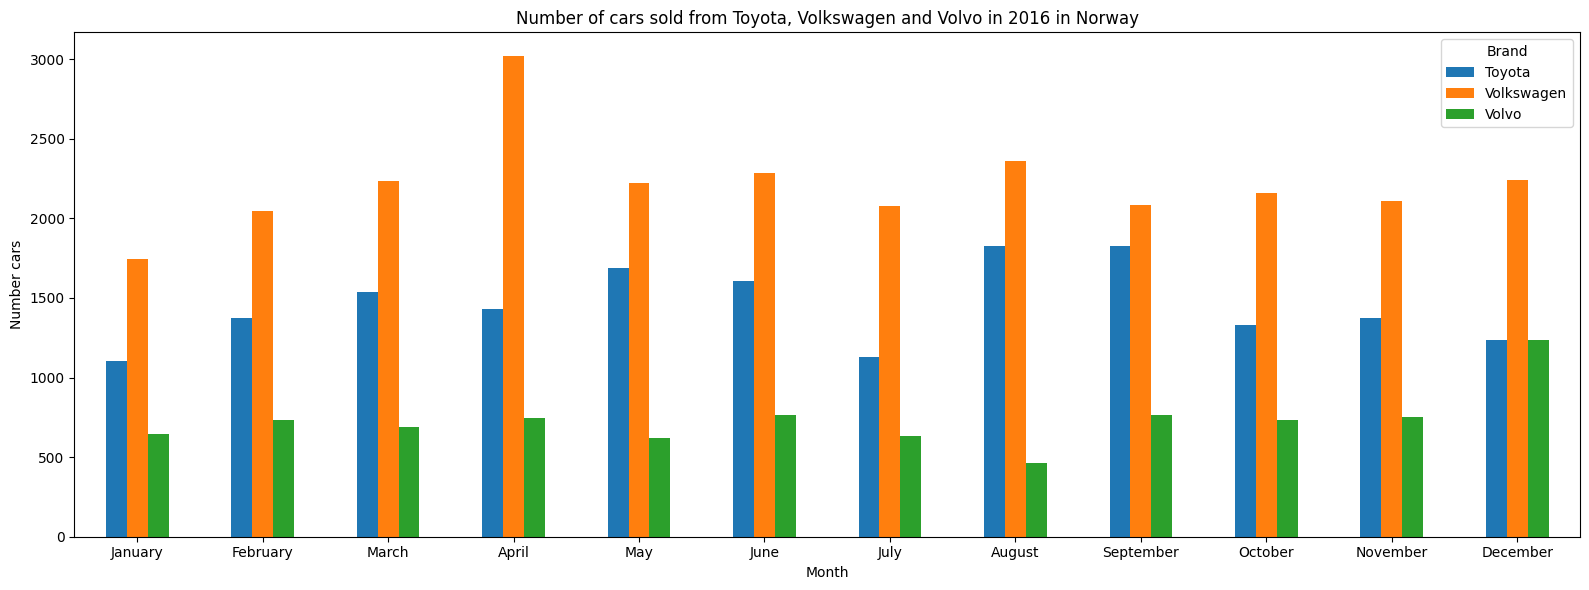

In [146]:
ax = df_month_brand_pivot.loc["2016"].plot(kind="bar", figsize=(16,6))
ax.set_xticklabels(months, rotation = 0);
ax.set(
    title="Number of cars sold from Toyota, Volkswagen and Volvo in 2016 in Norway",
    xlabel="Month",
    ylabel="Number cars",
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_stacked_bar.png")